# Business Problem Statement

# Objective

# Import libraries

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max.columns", None)  

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import category_encoders as ce
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import classification_report, r2_score, mean_squared_error, mean_absolute_error

from warnings import filterwarnings
filterwarnings("ignore")

# Importing the dataset

In [148]:
df1 = pd.read_csv("olist_products_dataset.csv") 
df2 = pd.read_csv("olist_order_items_dataset.csv") 
df3 = pd.read_csv("olist_sellers_dataset.csv") 
df4 = pd.read_csv("olist_geolocation_dataset.csv")
df5 = pd.read_csv("olist_customers_dataset.csv")  
df6 = pd.read_csv("olist_orders_dataset.csv") 
df7 = pd.read_csv("olist_order_payments_dataset.csv") 
df8 = pd.read_csv("olist_order_reviews_dataset.csv") 

In [149]:
# Print the shape of each DataFrame

print("Shape of df1 (products):", df1.shape)
print("Shape of df2 (order_items):", df2.shape)
print("Shape of df3 (sellers):", df3.shape)
print("Shape of df4 (geolocation):", df4.shape)
print("Shape of df5 (customers):", df5.shape)
print("Shape of df6 (orders):", df6.shape)
print("Shape of df7 (order_payments):", df7.shape)
print("Shape of df8 (order_reviews):", df8.shape)

Shape of df1 (products): (32951, 9)
Shape of df2 (order_items): (112650, 7)
Shape of df3 (sellers): (3095, 4)
Shape of df4 (geolocation): (1000163, 5)
Shape of df5 (customers): (99441, 5)
Shape of df6 (orders): (99441, 8)
Shape of df7 (order_payments): (103886, 5)
Shape of df8 (order_reviews): (99224, 7)


In [150]:
df_cat_name = pd.read_csv("product_category_name_translation.csv")

In [151]:
#Rename the product_category_name_english column
df_cat_name.rename(columns = {"product_category_name_english":"product_category_name1"}, inplace=True)

#Confirm the change in the column name
df_cat_name.columns

Index(['product_category_name', 'product_category_name1'], dtype='object')

In [152]:
 df_cat_name.head()

,product_category_name,product_category_name1
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Merging all csv file into one

In [153]:
merged_df = pd.merge(df6, df2, on='order_id')
merged_df = pd.merge(merged_df, df7, on='order_id')
merged_df = pd.merge(merged_df, df8, on='order_id')
merged_df = pd.merge(merged_df, df1, on='product_id')
merged_df = pd.merge(merged_df, df5, on='customer_id')
merged_df = pd.merge(merged_df, df3, on='seller_id')

merged_df.shape

(117329, 39)

In [154]:
merged_df.head()   # This will by default return top 5 records from dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,1,credit_card,3,37.77,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,1,credit_card,1,37.77,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350,maua,SP


In [155]:
merged_df.tail()   # This will return by default bottom 5 records from dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
117324,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,1,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,2018-07-10 08:32:33,79.0,14.13,1,boleto,1,93.13,7f9849fcbfdf9fa3070c05b5501bf066,5,NaN,NaN,2018-07-10 00:00:00,2018-07-10 18:32:29,construcao_ferramentas_iluminacao,40.0,516.0,2.0,750.0,30.0,28.0,28.0,2077f7ec37df79c62cc24b7b8f30e8c9,8528,ferraz de vasconcelos,SP,13660,porto ferreira,SP
117325,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaN,NaN,2017-03-30 00:00:00,1,241a1ffc9cf969b27de6e72301020268,8501d82f68d23148b6d78bb7c4a42037,2017-03-16 19:51:36,19.7,10.96,1,credit_card,1,30.66,c950324a42c5796d06f569f77d8b2e88,1,NaN,NaN,2017-04-01 00:00:00,2017-04-01 10:24:03,automotivo,48.0,260.0,2.0,400.0,16.0,4.0,11.0,78a159045124eb7601951b917a42034f,89111,gaspar,SC,89031,blumenau,SC
117326,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,1,1d187e8e7a30417fda31e85679d96f0f,d263fa444c1504a75cbca5cc465f592a,2018-07-30 11:24:27,399.0,45.07,1,debit_card,1,444.07,19f21ead7ffe5b1b5147a7877c22bae5,5,NaN,NaN,2018-08-03 00:00:00,2018-08-04 11:22:40,moveis_decoracao,43.0,729.0,2.0,2100.0,80.0,8.0,30.0,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,fortaleza,CE,13478,americana,SP
117327,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08 00:00:00,1,6e1c2008dea1929b9b6c27fa01381e90,edf3fabebcc20f7463cc9c53da932ea8,2018-05-28 21:31:24,219.9,24.12,1,credit_card,4,244.02,ec2817e750153dfdd61894780dfc5d9e,4,NaN,NaN,2018-06-10 00:00:00,2018-06-13 09:17:47,moveis_decoracao,19.0,531.0,1.0,5900.0,41.0,21.0,41.0,e55e436481078787e32349cee9febf5e,39803,teofilo otoni,MG,8320,sao paulo,SP
117328,1565f22aa9452ff278638e87cc895678,56772dfbcbe7df908a284ff0d53adf7d,delivered,2018-05-15 17:41:00,2018-05-16 03:35:29,2018-05-16 17:20:00,2018-05-21 14:31:41,2018-05-29 00:00:00,1,9c1e194db1d35a79d962ea610bfe0868,f3862c2188522d89860c38a3ea8b550d,2018-05-22 03:35:29,15.5,12.79,1,boleto,1,28.29,cbb879403973e209b4df371a5dafbaa7,5,NaN,NaN,2018-06-01 00:00:00,2018-06-01 15:14:23,perfumaria,40.0,871.0,1.0,83.0,17.0,8.0,13.0,6ceea7c1088e15ab3c67980a2d9bb309,9687,sao bernardo do campo,SP,14092,ribeirao preto,SP


In [156]:
merged_df.info()   # info() give me all the columns name ,datatype and is there any missing values  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

In [157]:
merged_df.columns  # This will retrun me all the coulmns name from my dataframe 

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

In [158]:
# Converting datetime data type

merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])
merged_df['order_approved_at'] = pd.to_datetime(merged_df['order_approved_at'])
merged_df['order_delivered_carrier_date'] = pd.to_datetime(merged_df['order_delivered_carrier_date'])
merged_df['order_delivered_customer_date'] = pd.to_datetime(merged_df['order_delivered_customer_date'])
merged_df['order_estimated_delivery_date'] = pd.to_datetime(merged_df['order_estimated_delivery_date'])
merged_df['shipping_limit_date'] = pd.to_datetime(merged_df['shipping_limit_date'])
merged_df['review_creation_date'] = pd.to_datetime(merged_df['review_creation_date'])
merged_df['review_answer_timestamp'] = pd.to_datetime(merged_df['review_answer_timestamp'])

#### Divide the data according to categorical and Numeric datatypes 

In [159]:
df_with_id_col = merged_df.copy()

In [160]:
all_id_col = ['review_id','order_id','customer_id','customer_unique_id','order_item_id','product_id','seller_id']
merged_df.drop(columns= all_id_col, axis = 1, inplace = True)
# I will drop all the columns related to ID because those are not important for my model building

In [161]:
df_num = merged_df.select_dtypes(include=np.number)   # All the numeric column data i will store in df_num
df_cat = merged_df.select_dtypes(include='object')   # All the categorical column data i will store in df_cat

# Statistical Summary

In [162]:
df_num.describe().T   # All the Numeric columns 5 point summary or Statistical summary

,count,mean,std,min,25%,50%,75%,max
price,117329.0,120.524349,182.944843,0.85,39.90,74.90,134.90,6735.00
freight_value,117329.0,20.027514,15.828077,0.00,13.08,16.28,21.18,409.68
payment_sequential,117329.0,1.094452,0.731174,1.00,1.00,1.00,1.00,29.00
payment_installments,117329.0,2.940151,2.775370,0.00,1.00,2.00,4.00,24.00
payment_value,117329.0,172.062565,265.388194,0.00,60.75,108.10,189.06,13664.08
review_score,117329.0,4.031467,1.387927,1.00,4.00,5.00,5.00,5.00
product_name_lenght,115634.0,48.768018,10.033831,5.00,42.00,52.00,57.00,76.00
product_description_lenght,115634.0,785.802861,652.382965,4.00,346.00,600.00,983.00,3992.00
product_photos_qty,115634.0,2.205528,1.717783,1.00,1.00,1.00,3.00,20.00
product_weight_g,117309.0,2110.763062,3785.128931,0.00,300.00,700.00,1800.00,40425.00


In [163]:
df_num = df_num.drop('price',axis=1)   # I will drop "Price" columns from the numeric columns because this is my target variable

In [164]:
df_cat.describe()    # All Categorical columns 5 point summary or Statistical summary

,order_status,payment_type,review_comment_title,review_comment_message,product_category_name,customer_city,customer_state,seller_city,seller_state
count,117329,117329,13892,49679,115634,117329,117329,117329,117329
unique,7,4,4497,35691,73,4108,27,611,23
top,delivered,credit_card,Recomendo,Muito bom,cama_mesa_banho,sao paulo,SP,sao paulo,SP
freq,114859,86520,494,259,11847,18582,49527,29048,83671


# Outliers Treatment

In [165]:
df_num.columns

Index(['freight_value', 'payment_sequential', 'payment_installments',
       'payment_value', 'review_score', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_zip_code_prefix', 'seller_zip_code_prefix'],
      dtype='object')

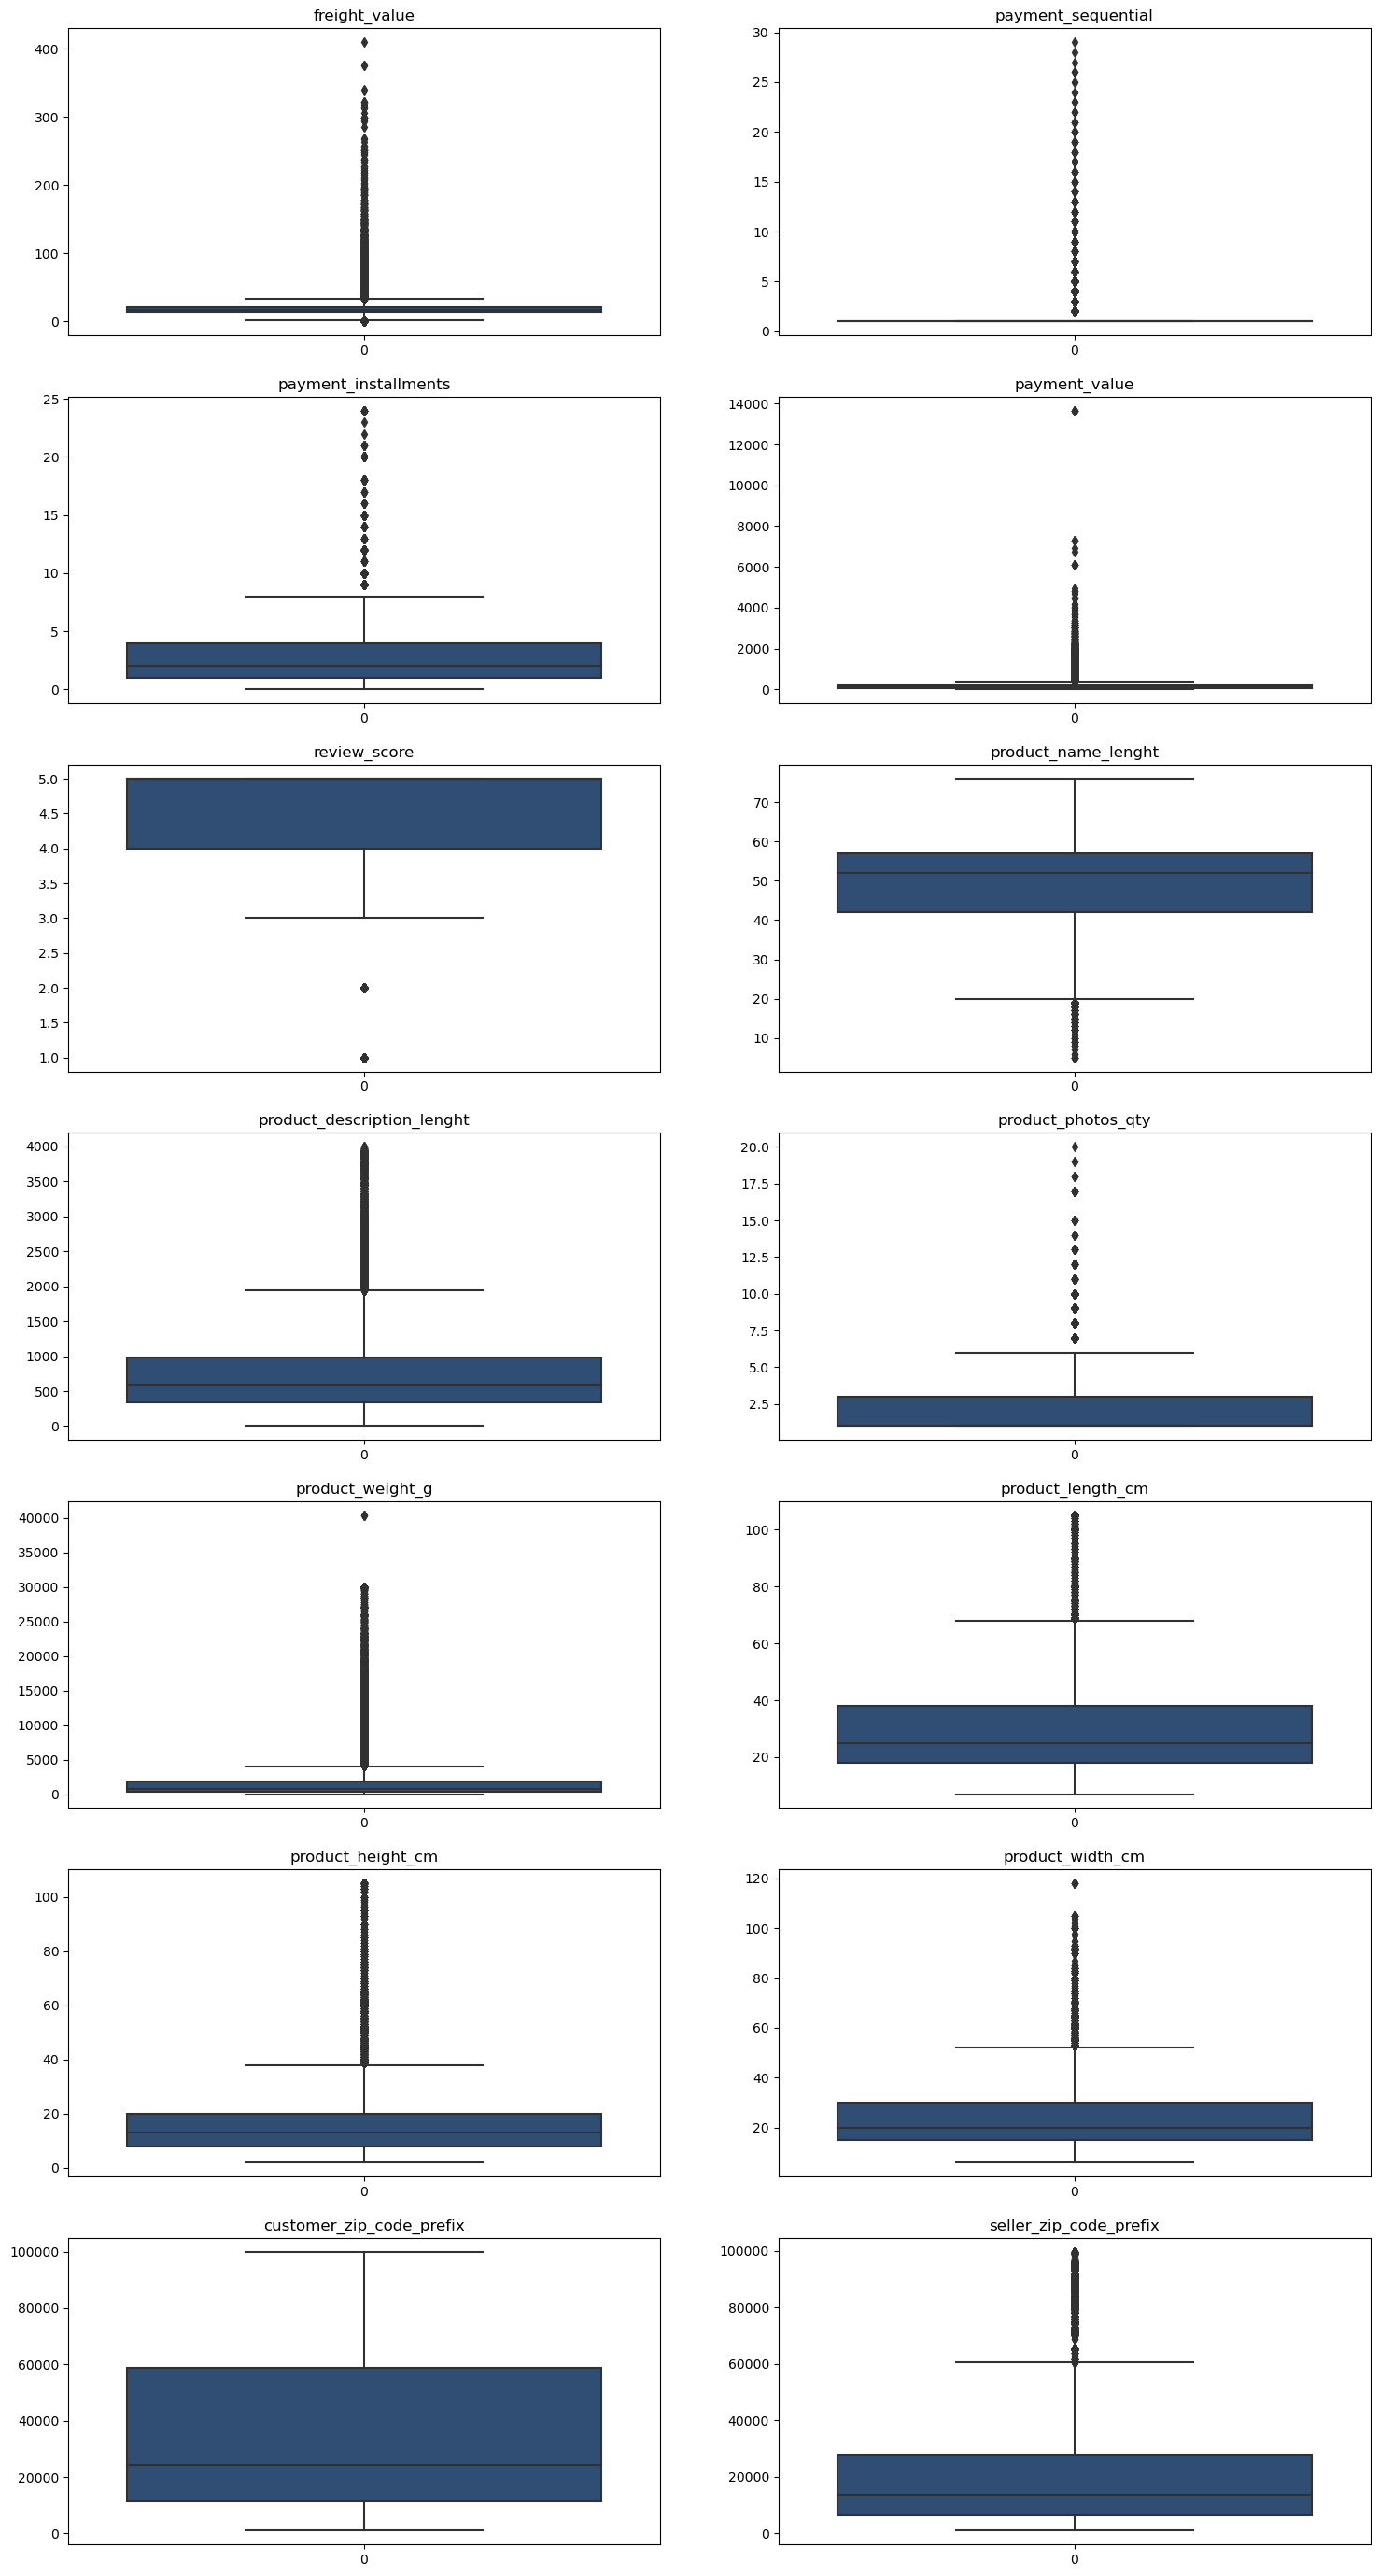

In [166]:
fig , ax  = plt.subplots(7,2,figsize = (18,35))

for variable, i in zip(df_num,ax.flatten()):
    boxplot = sns.boxplot(merged_df[variable],ax = i)
    boxplot.set_title(variable)
plt.show()

# Correlation matrix

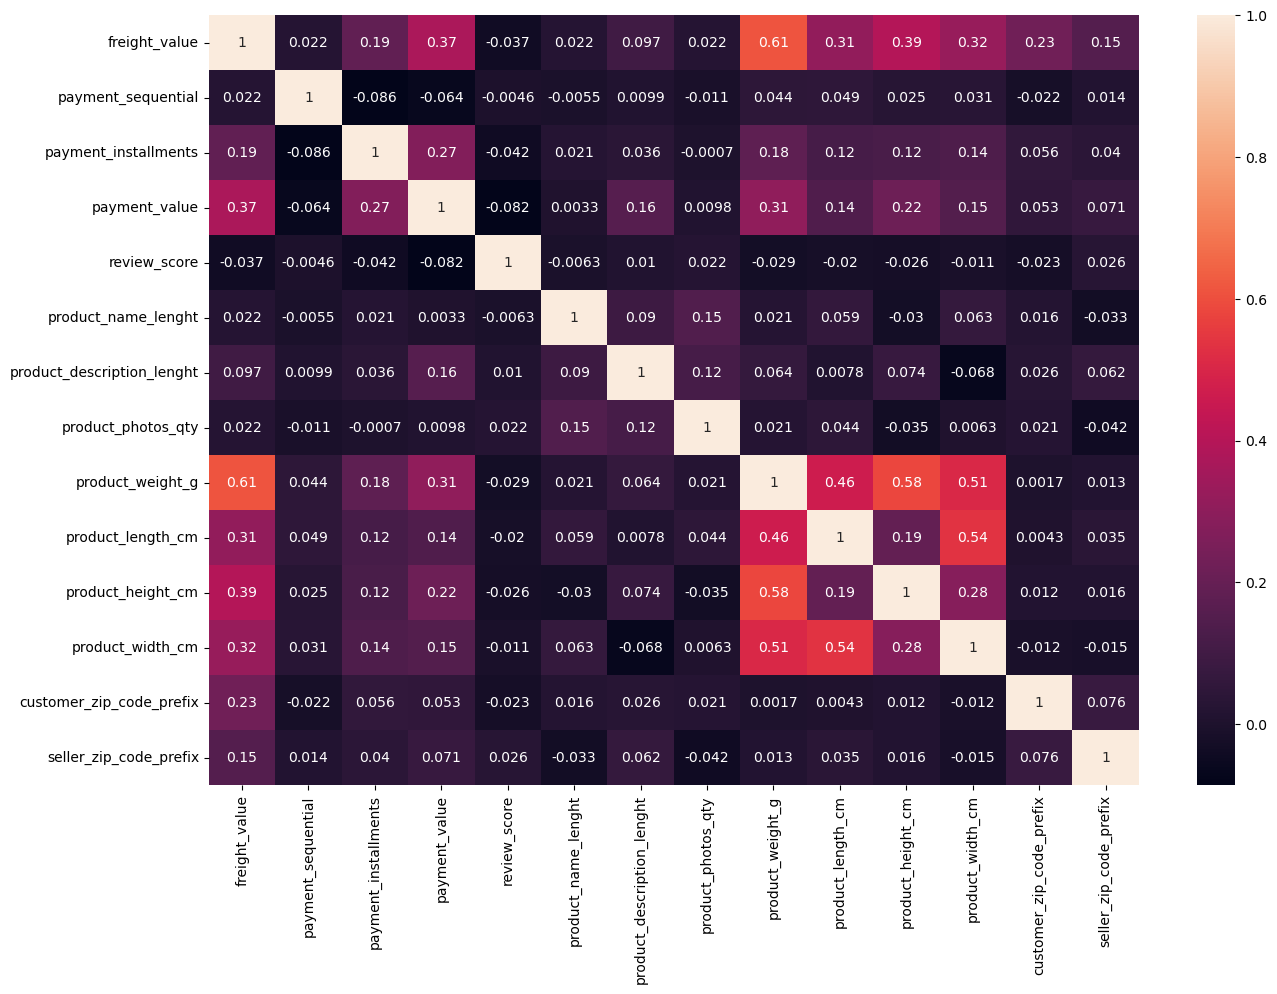

In [167]:
plt.figure(figsize=(15,10))
sns.heatmap(df_num.corr(), annot = True,fmt = '.2g')
plt.show()

# Missing values Treatments

In [168]:
(merged_df.isnull().sum()/(merged_df.index.size)*100)[(merged_df.isnull().sum()/merged_df.index.size)*100  > 0].sort_values(ascending=False)

review_comment_title             88.159790
review_comment_message           57.658379
order_delivered_customer_date     2.106044
product_category_name             1.444656
product_name_lenght               1.444656
product_description_lenght        1.444656
product_photos_qty                1.444656
order_delivered_carrier_date      1.052596
product_weight_g                  0.017046
product_length_cm                 0.017046
product_height_cm                 0.017046
product_width_cm                  0.017046
order_approved_at                 0.012785
dtype: float64

In [169]:
imputer = SimpleImputer(strategy='median')   # Missing value treatments on numeric columns

df_num_imputed = pd.DataFrame(imputer.fit_transform(df_num), columns=df_num.columns)

df_num_imputed.head()

,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix
0,8.72,1.0,1.0,18.12,4.0,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149.0,9350.0
1,8.72,3.0,1.0,2.00,4.0,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149.0,9350.0
2,8.72,2.0,1.0,18.59,4.0,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149.0,9350.0
3,7.78,1.0,3.0,37.77,4.0,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3366.0,9350.0
4,7.78,1.0,1.0,37.77,5.0,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2290.0,9350.0


In [170]:
df_num_imputed.isnull().sum()

freight_value                 0
payment_sequential            0
payment_installments          0
payment_value                 0
review_score                  0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
customer_zip_code_prefix      0
seller_zip_code_prefix        0
dtype: int64

In [171]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')  # Missing value treatments on numeric columns

imputer= imputer.fit(df_cat.iloc[:,:])

df_cat_trans=imputer.transform(df_cat)

df_cat_imputed = pd.DataFrame(df_cat_trans,columns=df_cat.columns)

In [172]:
df_cat_imputed.isnull().sum()

order_status              0
payment_type              0
review_comment_title      0
review_comment_message    0
product_category_name     0
customer_city             0
customer_state            0
seller_city               0
seller_state              0
dtype: int64

# EDA

In [173]:
#Top sales by State

TopSales_state = df_with_id_col.groupby(["customer_state"]).agg({"payment_value":"sum"})
TopSales_state.sort_values(ascending=False, by="payment_value")[:10].reset_index()

,customer_state,payment_value
0,SP,7599878.17
1,RJ,2741288.10
2,MG,2313559.77
3,RS,1151947.74
4,PR,1066626.81
5,BA,791726.11
6,SC,778620.70
7,GO,469961.30
8,DF,433599.85
9,ES,392818.65


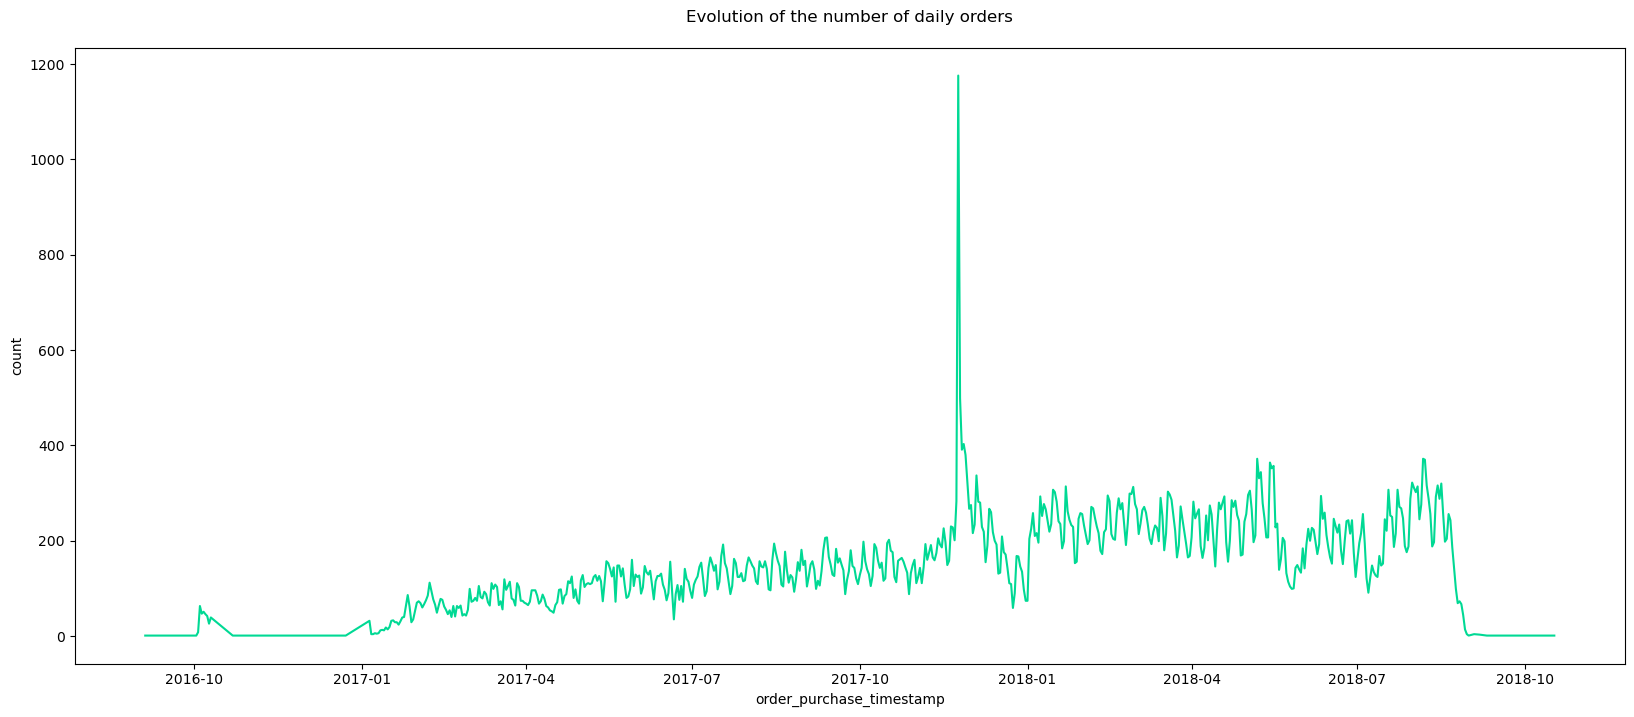

In [174]:
orders_per_days = df2.groupby(df6["order_purchase_timestamp"]\
                                      .astype('datetime64[ns]').dt.date)\
                                    .count()["order_id"]
fig = plt.figure(figsize=(20, 8))

ax = orders_per_days.plot(color="#00d994")

ax.set_ylabel("count")
plt.title(f"Evolution of the number of daily orders\n")
plt.show()

In [175]:
# Top sales by product category per state and city.

TopProduct_city = df_with_id_col.groupby(["customer_state", "customer_city", "product_category_name"]).agg({"payment_value":"sum" ,"order_item_id":"count"})
TopProduct_city = TopProduct_city.sort_values(ascending=False, by="payment_value")[:13].reset_index()
TopProduct_city

,customer_state,customer_city,product_category_name,payment_value,order_item_id
0,SP,sao paulo,cama_mesa_banho,295685.33,2172
1,SP,sao paulo,informatica_acessorios,288500.24,1256
2,SP,sao paulo,beleza_saude,263482.10,1792
3,SP,sao paulo,relogios_presentes,194797.90,861
4,SP,sao paulo,esporte_lazer,192716.46,1462
5,SP,sao paulo,moveis_decoracao,192627.46,1357
6,SP,sao paulo,utilidades_domesticas,165754.91,1397
7,RJ,rio de janeiro,cama_mesa_banho,127026.50,907
8,RJ,rio de janeiro,telefonia_fixa,112491.22,24
9,RJ,rio de janeiro,esporte_lazer,107840.56,606


In [176]:
# Top sales by product category per state and city.

TopProduct_city = df_with_id_col.groupby(["customer_state", "customer_city", "product_category_name"]).agg({"payment_value":"sum"})
TopProduct_city = TopProduct_city.sort_values(ascending=False, by="payment_value")[:13].reset_index()
TopProduct_city

,customer_state,customer_city,product_category_name,payment_value
0,SP,sao paulo,cama_mesa_banho,295685.33
1,SP,sao paulo,informatica_acessorios,288500.24
2,SP,sao paulo,beleza_saude,263482.10
3,SP,sao paulo,relogios_presentes,194797.90
4,SP,sao paulo,esporte_lazer,192716.46
5,SP,sao paulo,moveis_decoracao,192627.46
6,SP,sao paulo,utilidades_domesticas,165754.91
7,RJ,rio de janeiro,cama_mesa_banho,127026.50
8,RJ,rio de janeiro,telefonia_fixa,112491.22
9,RJ,rio de janeiro,esporte_lazer,107840.56


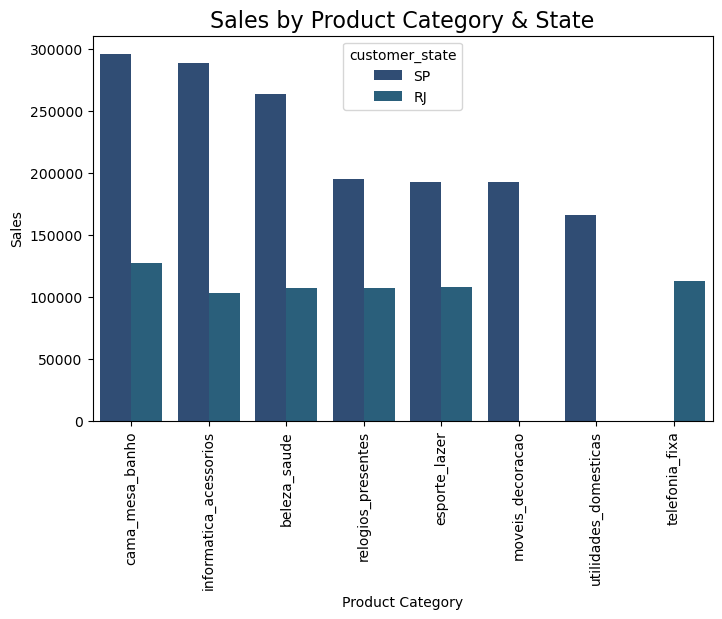

In [177]:
# Plot top sales by state and product category

plt.figure(figsize=(8,5))

sns.barplot(x="product_category_name", y='payment_value', hue = "customer_state", data=TopProduct_city)

plt.xticks(rotation=90)
plt.title('Sales by Product Category & State', fontsize=16)
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.show()

In [178]:
# Top sales by product category per state and city.

TopProduct_city = df_with_id_col.groupby(["customer_state", "customer_city", "product_category_name"]).agg({"payment_value":"sum", "order_item_id":"count"})
TopProduct_city = TopProduct_city.sort_values(ascending=False, by="payment_value")[:13].reset_index()
TopProduct_city

,customer_state,customer_city,product_category_name,payment_value,order_item_id
0,SP,sao paulo,cama_mesa_banho,295685.33,2172
1,SP,sao paulo,informatica_acessorios,288500.24,1256
2,SP,sao paulo,beleza_saude,263482.10,1792
3,SP,sao paulo,relogios_presentes,194797.90,861
4,SP,sao paulo,esporte_lazer,192716.46,1462
5,SP,sao paulo,moveis_decoracao,192627.46,1357
6,SP,sao paulo,utilidades_domesticas,165754.91,1397
7,RJ,rio de janeiro,cama_mesa_banho,127026.50,907
8,RJ,rio de janeiro,telefonia_fixa,112491.22,24
9,RJ,rio de janeiro,esporte_lazer,107840.56,606


In [179]:
# Lets look at the total customers by state and city

Tot_Cus_city = df_with_id_col.groupby(["customer_state", "customer_city"]).agg({"customer_id":"count"})
Tot_Cus_city = Tot_Cus_city.sort_values(ascending=False, by="customer_id")[:10].reset_index()
Tot_Cus_city

,customer_state,customer_city,customer_id
0,SP,sao paulo,18582
1,RJ,rio de janeiro,8158
2,MG,belo horizonte,3252
3,DF,brasilia,2466
4,PR,curitiba,1807
5,SP,campinas,1723
6,RS,porto alegre,1658
7,BA,salvador,1507
8,SP,guarulhos,1386
9,SP,sao bernardo do campo,1119


In [180]:
# Lets review the Top10 products by total sales & orders

Top10_products = df_with_id_col.groupby("product_category_name").agg({"payment_value":"sum", "order_id":"nunique", "order_item_id":"count"})
Top10_products = Top10_products.sort_values(ascending=False, by=["payment_value", "order_id"])[:10].reset_index()
Top10_products

,product_category_name,payment_value,order_id,order_item_id
0,cama_mesa_banho,1725465.67,9313,11847
1,beleza_saude,1646292.53,8770,9944
2,informatica_acessorios,1592611.66,6649,8105
3,moveis_decoracao,1427214.01,6398,8743
4,relogios_presentes,1420682.17,5576,6161
5,esporte_lazer,1390581.87,7669,8942
6,utilidades_domesticas,1091709.15,5843,7331
7,ferramentas_jardim,834757.45,3496,4558
8,automotivo,802254.74,3877,4356
9,cool_stuff,772616.70,3599,3964


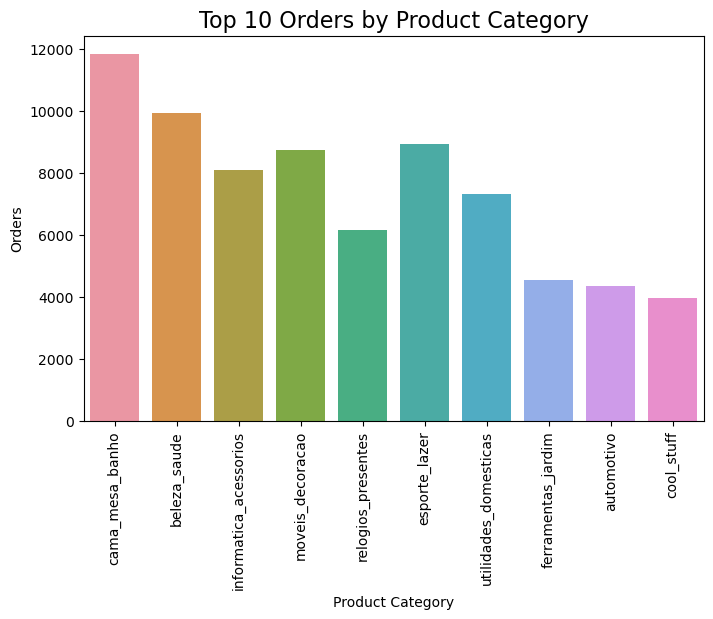

In [181]:
# Plot top orders by state and product category

plt.figure(figsize=(8,5))

sns.barplot(x="product_category_name", y='order_item_id', data=Top10_products,errorbar=None)

plt.xticks(rotation=90)
plt.title('Top 10 Orders by Product Category', fontsize=16)
plt.xlabel('Product Category')
plt.ylabel('Orders')
plt.show()

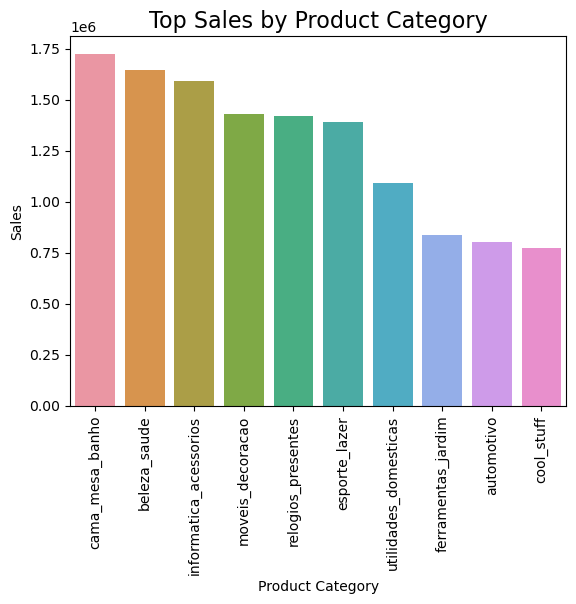

In [182]:
#Plot top orders by state and product category

sns.barplot(x="product_category_name", y='payment_value', data=Top10_products,errorbar=None)

plt.xticks(rotation=90)
plt.title('Top Sales by Product Category', fontsize=16)
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.show()

In [183]:
# Confirming the average price & freight value by Product category

MeanSales_cat = df_with_id_col.groupby(["product_category_name"]).agg({"price":"mean", "freight_value":"mean"})
MeanSales_cat = MeanSales_cat.sort_values(ascending=False, by="price")[:10].reset_index()
MeanSales_cat

,product_category_name,price,freight_value
0,pcs,1078.555806,47.247281
1,portateis_casa_forno_e_cafe,627.509103,36.982821
2,eletrodomesticos_2,459.567388,46.039925
3,agro_industria_e_comercio,332.706151,27.646111
4,instrumentos_musicais,290.755042,27.321798
5,eletroportateis,285.925980,23.982189
6,portateis_cozinha_e_preparadores_de_alimentos,264.568667,20.650667
7,telefonia_fixa,227.291004,17.538587
8,construcao_ferramentas_seguranca,211.861162,20.068182
9,relogios_presentes,202.204692,16.822451


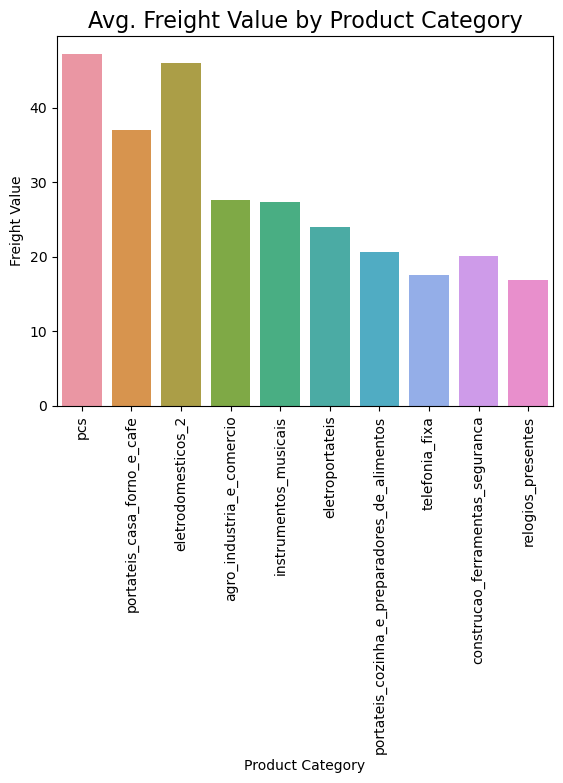

In [184]:
#Plot avg freight by product category

sns.barplot(x="product_category_name", y='freight_value', data=MeanSales_cat,errorbar=None)

plt.xticks(rotation=90)
plt.title('Avg. Freight Value by Product Category', fontsize=16)
plt.xlabel('Product Category')
plt.ylabel('Freight Value')
plt.show()

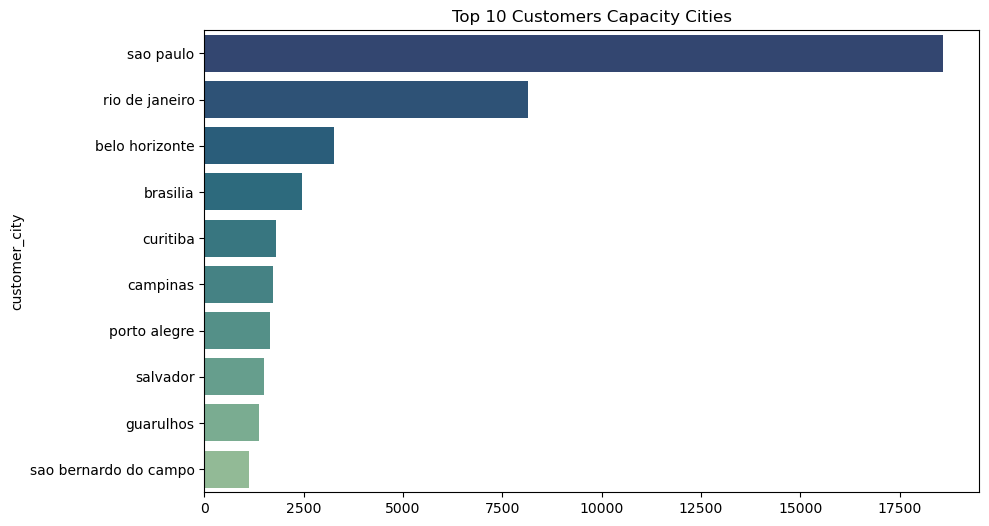

In [185]:
# Top 10 Customers Capacity Cities

plt.figure(figsize=[10, 6])
sns.barplot(x = df_with_id_col.customer_city.value_counts().values[:10], y = merged_df.customer_city.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Customers Capacity Cities')
plt.show()

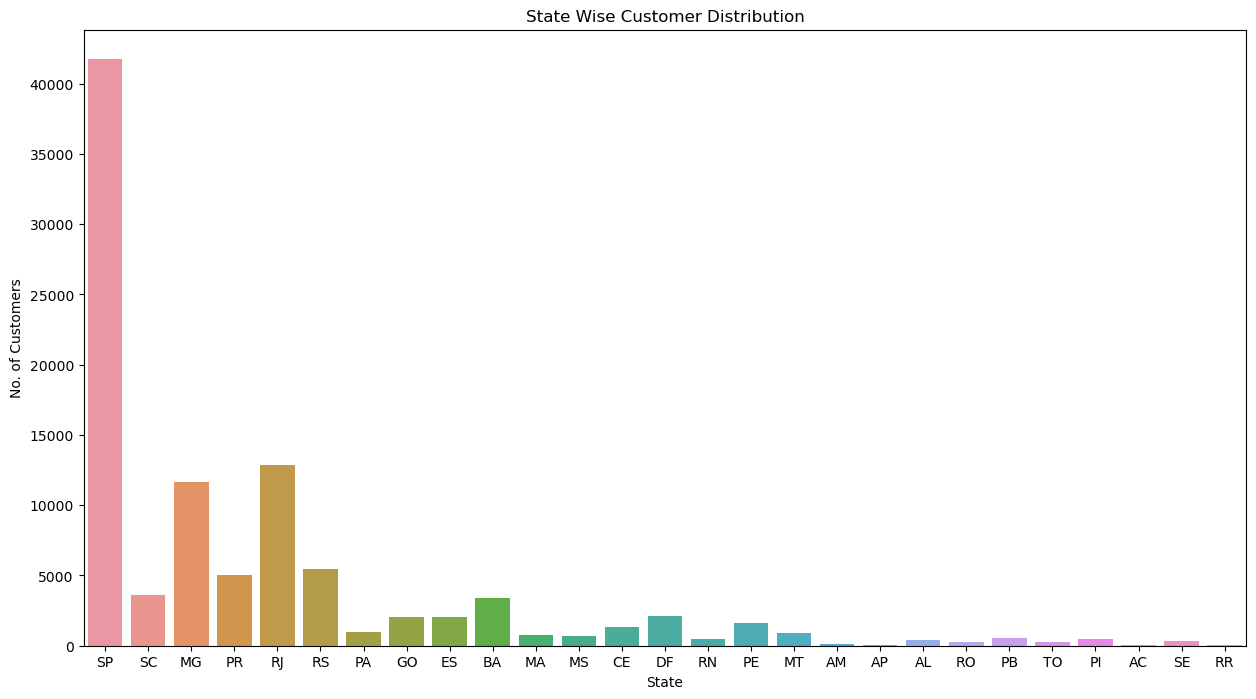

In [186]:
# plotting state wise customer distribution

plt.figure(figsize=(15,8))
sns.countplot(x='customer_state', data=df5)
plt.title('State Wise Customer Distribution')
plt.xlabel('State')
plt.ylabel('No. of Customers')
plt.show()

- As we can see, the most number of customer come from state code 'SP', followed by 'RJ' and 'MG', which are all situated in the SouthEast region of Brazil.

In [187]:
print(df7["payment_type"].value_counts())

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


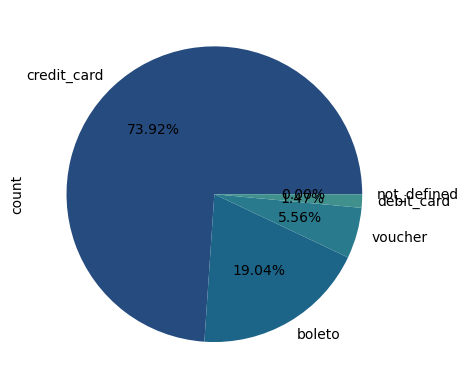

In [188]:
df7["payment_type"].value_counts().plot(kind="pie",autopct="%1.2f%%")
plt.show()

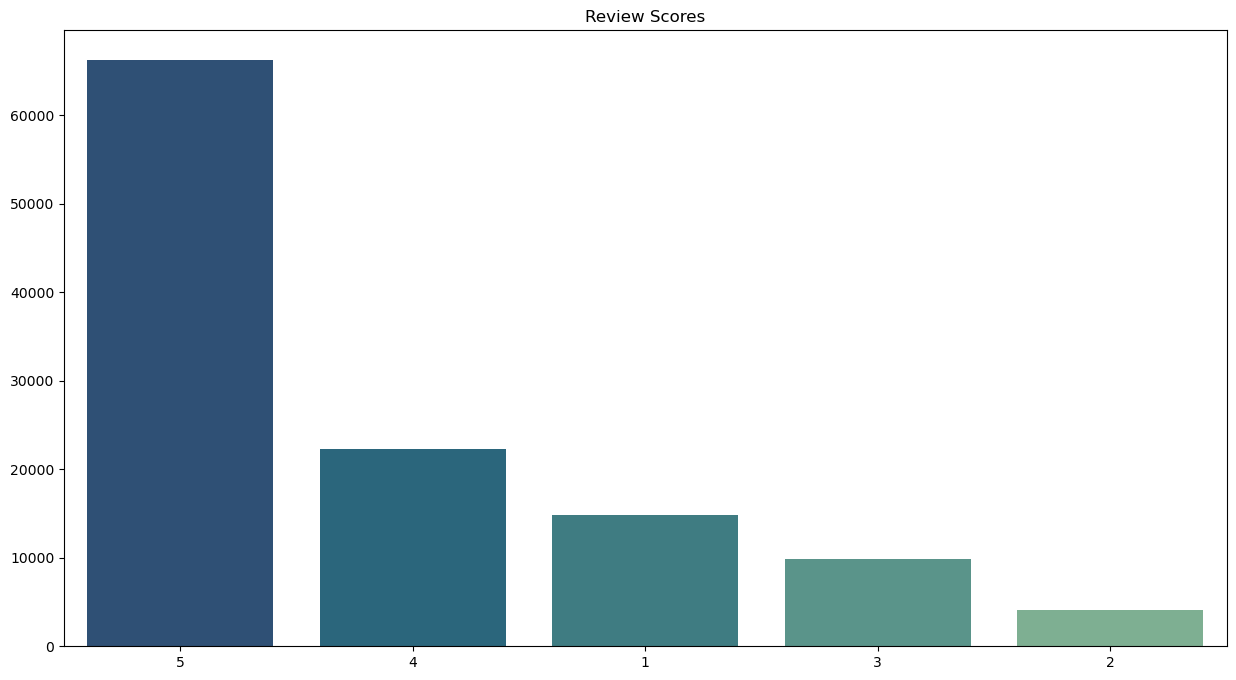

In [189]:
# Review_Score

plt.figure(figsize=[15, 8])

review_score_index = [str(i) for i in df_with_id_col.review_score.value_counts().index]
sns.barplot(x = review_score_index, y= df_with_id_col.review_score.value_counts().values, palette= 'crest_r')

plt.title('Review Scores')
plt.show()

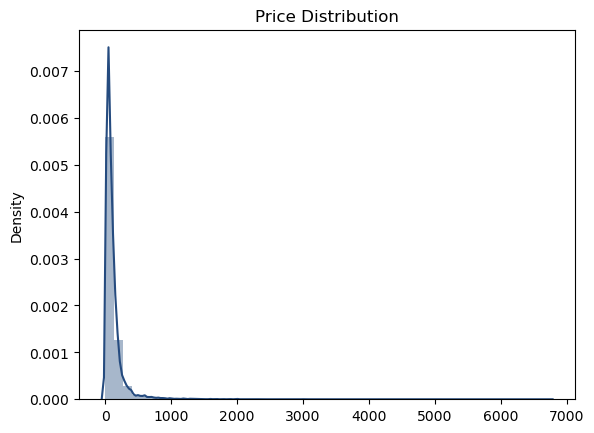

In [190]:
# Price

sns.set_palette('crest_r')
sns.distplot(x = df_with_id_col.price)
plt.title('Price Distribution')
plt.show()

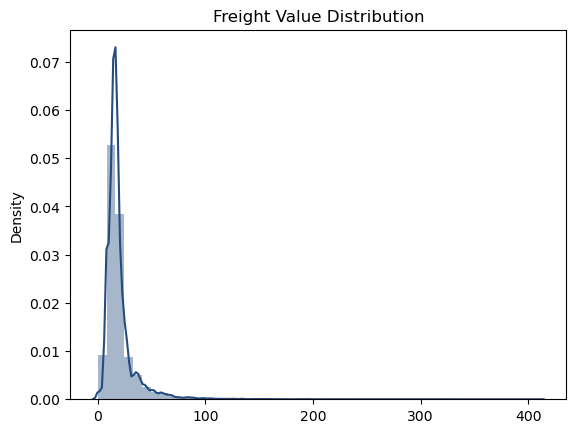

In [191]:
# Freight Value 

sns.set_palette('crest_r')
sns.distplot(x =df_with_id_col.freight_value)
plt.title('Freight Value Distribution')
plt.show()

In [192]:
# Group each payment type by average payment value

payment_methods = df_with_id_col.groupby('payment_type')[['payment_value']].sum().sort_values(by='payment_value', ascending=False)
payment_methods.reset_index(inplace=True)

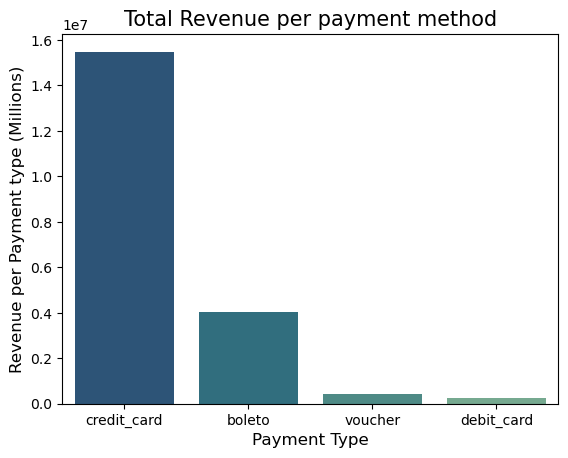

In [193]:
# plot Average payments per payment method
 
sns.barplot(x = payment_methods.payment_type, y= payment_methods.payment_value, palette= 'crest_r')

plt.title('Total Revenue per payment method', fontsize= 15)
plt.xlabel('Payment Type', fontsize= 12)
plt.ylabel('Revenue per Payment type (Millions)', fontsize= 12)
plt.show()

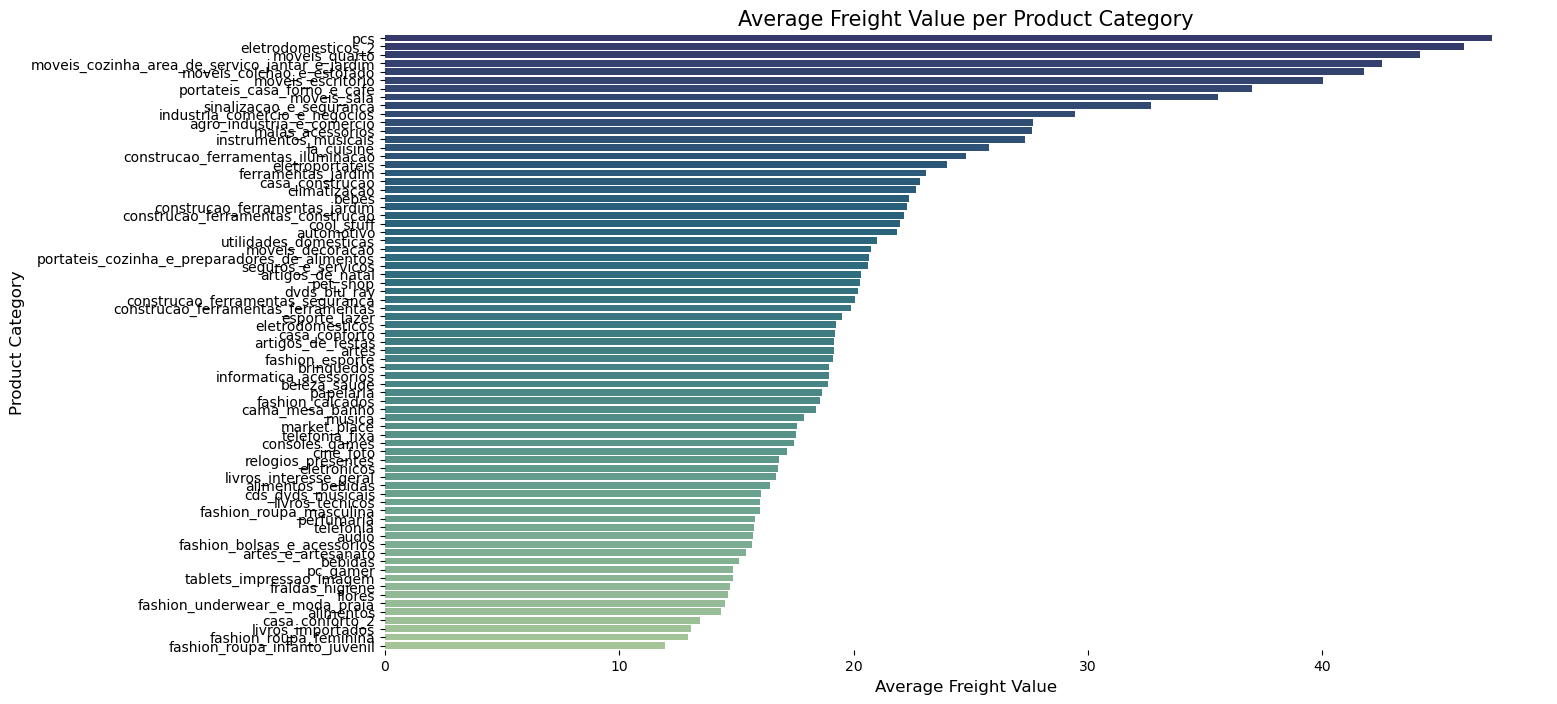

In [194]:
# Group product category by average freight value

freight_per_cat = df_with_id_col.groupby('product_category_name')[['freight_value']].mean().sort_values(by='freight_value', ascending=False)
freight_per_cat.reset_index(inplace=True)

plt.figure(figsize=[15, 8])

sns.barplot(x = freight_per_cat.freight_value, y=  freight_per_cat.product_category_name, palette= 'crest_r')

plt.title('Average Freight Value per Product Category', fontsize= 15)
plt.xlabel('Average Freight Value',fontsize= 12)
plt.ylabel('Product Category', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);
plt.show()

# Transformation 

In [195]:
df_target_log = np.log(merged_df['price'])    # Apply Tranformation on target columns using log method
df_target_log.skew()

0.24135800716953448

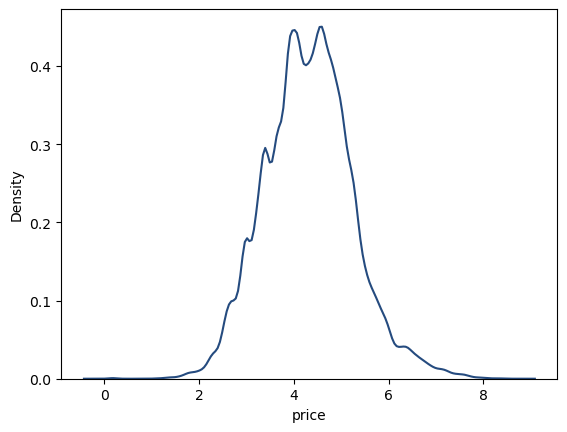

In [196]:
sns.kdeplot(df_target_log)
plt.show()

In [197]:
df_target = np.sqrt(merged_df['price'])   # Apply Tranformation on target columns using sqrt method
df_target.skew()

2.510024838430951

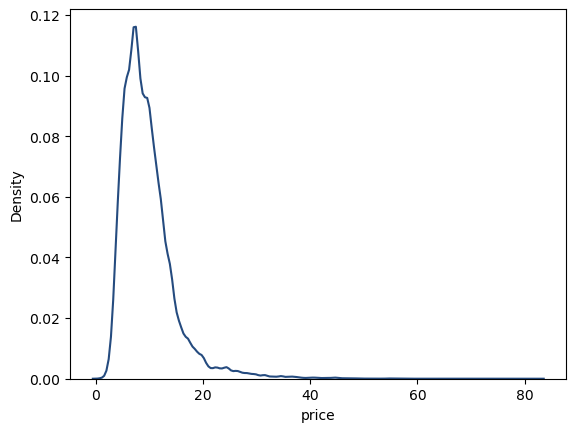

In [198]:
sns.kdeplot(df_target)
plt.show()

In [199]:
data = merged_df[['price']]    # This method give make my data nearest to normal distribution so we will use this

pt = PowerTransformer(method='yeo-johnson')     # yeo-johnson Transformation method
transformed_data_yeo = pt.fit_transform(data)
skewness_yeo = stats.skew(transformed_data_yeo)
print(skewness_yeo)

[-0.00664307]


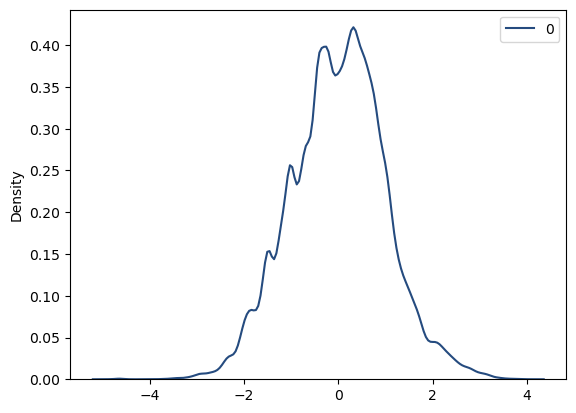

In [200]:
sns.kdeplot(transformed_data_yeo)
plt.show()

In [201]:
data = merged_df[['price']]

pt = PowerTransformer(method='box-cox')      # box-cox Transformation method
transformed_data_box = pt.fit_transform(data)
skewness_box = stats.skew(transformed_data_box)
print(skewness_box)

[-0.00796153]


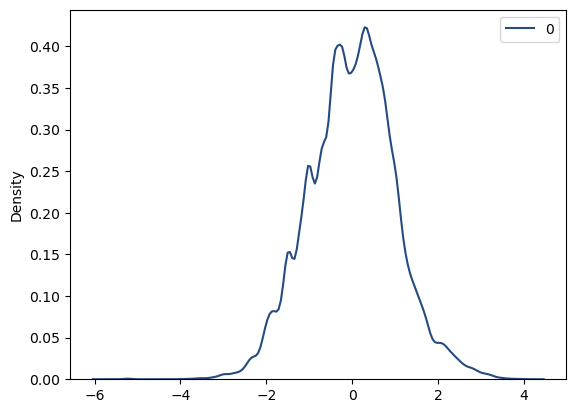

In [202]:
sns.kdeplot(transformed_data_box)
plt.show()

# Scaling 

In [203]:
ss = StandardScaler()
num_scaled_data = pd.DataFrame(ss.fit_transform(df_num_imputed), columns=df_num_imputed.columns)

In [204]:
num_scaled_data.head()

,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix
0,-0.714399,-0.129180,-0.699063,-0.580068,-0.022672,-0.884255,-0.794899,1.05873,-0.42552,-0.695686,-0.640215,-0.857473,-1.069072,-0.547482
1,-0.714399,2.606161,-0.699063,-0.640810,-0.022672,-0.884255,-0.794899,1.05873,-0.42552,-0.695686,-0.640215,-0.857473,-1.069072,-0.547482
2,-0.714399,1.238491,-0.699063,-0.578297,-0.022672,-0.884255,-0.794899,1.05873,-0.42552,-0.695686,-0.640215,-0.857473,-1.069072,-0.547482
3,-0.773787,-0.129180,0.021564,-0.506025,-0.022672,-0.884255,-0.794899,1.05873,-0.42552,-0.695686,-0.640215,-0.857473,-1.061802,-0.547482
4,-0.773787,-0.129180,-0.699063,-0.506025,0.697830,-0.884255,-0.794899,1.05873,-0.42552,-0.695686,-0.640215,-0.857473,-1.097850,-0.547482


# Encoding Techniques

In [205]:
def cat_boost(cat_input,target):
    catboost = ce.cat_boost.CatBoostEncoder()
    catboost.fit(cat_input,target)
    df_encode= round(catboost.transform(cat_input),2)
    return df_encode

In [206]:
df_cat_en = cat_boost(df_cat_imputed,merged_df['price'])

In [207]:
df_cat_en.head()

,order_status,payment_type,review_comment_title,review_comment_message,product_category_name,customer_city,customer_state,seller_city,seller_state
0,119.77,126.25,119.14,52.62,90.61,108.14,109.9,59.33,108.65
1,119.77,104.29,119.14,52.62,90.61,108.14,109.9,59.33,108.65
2,119.77,104.29,119.14,52.62,90.61,108.14,109.9,59.33,108.65
3,119.77,126.25,119.14,120.52,90.61,108.14,109.9,59.33,108.65
4,119.77,126.25,119.14,120.52,90.61,108.14,109.9,59.33,108.65


In [208]:
final_df = pd.concat([num_scaled_data, df_cat_en], axis = 1)

In [209]:
final_df.head()

,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix,order_status,payment_type,review_comment_title,review_comment_message,product_category_name,customer_city,customer_state,seller_city,seller_state
0,-0.714399,-0.129180,-0.699063,-0.580068,-0.022672,-0.884255,-0.794899,1.05873,-0.42552,-0.695686,-0.640215,-0.857473,-1.069072,-0.547482,119.77,126.25,119.14,52.62,90.61,108.14,109.9,59.33,108.65
1,-0.714399,2.606161,-0.699063,-0.640810,-0.022672,-0.884255,-0.794899,1.05873,-0.42552,-0.695686,-0.640215,-0.857473,-1.069072,-0.547482,119.77,104.29,119.14,52.62,90.61,108.14,109.9,59.33,108.65
2,-0.714399,1.238491,-0.699063,-0.578297,-0.022672,-0.884255,-0.794899,1.05873,-0.42552,-0.695686,-0.640215,-0.857473,-1.069072,-0.547482,119.77,104.29,119.14,52.62,90.61,108.14,109.9,59.33,108.65
3,-0.773787,-0.129180,0.021564,-0.506025,-0.022672,-0.884255,-0.794899,1.05873,-0.42552,-0.695686,-0.640215,-0.857473,-1.061802,-0.547482,119.77,126.25,119.14,120.52,90.61,108.14,109.9,59.33,108.65
4,-0.773787,-0.129180,-0.699063,-0.506025,0.697830,-0.884255,-0.794899,1.05873,-0.42552,-0.695686,-0.640215,-0.857473,-1.097850,-0.547482,119.77,126.25,119.14,120.52,90.61,108.14,109.9,59.33,108.65


# Assumptions of Linear Regression

### Assumption to be checked before building a model

* Target variable(Dependent variable) is price which is numeric variable. 

In [210]:
merged_df['price'].dtypes   # Price is target variable and is numeric  

dtype('float64')

* To check Absence of Multicollinearity we use VIF(Variance influence factor) method.
* HO : High multicollinearity
* H1 : No multicollinearity

In [211]:
df_numeric_X = sm.add_constant(df_num_imputed)
vif_value = [VIF(df_numeric_X.values, i) for i in range(df_numeric_X.shape[1])]
pd.DataFrame(vif_value, columns= ['VIF_Value'], index = df_numeric_X.columns).sort_values('VIF_Value', ascending=False)

,VIF_Value
const,46.266579
product_weight_g,2.605071
freight_value,1.904854
product_width_cm,1.627016
product_height_cm,1.550187
product_length_cm,1.534482
payment_value,1.270091
payment_installments,1.108986
customer_zip_code_prefix,1.091964
product_description_lenght,1.069064


# Train Test Split

In [212]:
X = final_df
y = transformed_data_yeo

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state = 10)
print("X Train shape is ",X_train.shape)
print("X Test shape is ",X_test.shape)
print("y Train shape is ",y_train.shape)
print("y Test shape is ",y_test.shape)

X Train shape is  (82130, 23)
X Test shape is  (35199, 23)
y Train shape is  (82130, 1)
y Test shape is  (35199, 1)


# Linear Regression Model

## Base Model

In [214]:
def performance(x,y,model):
    
    y_pred = model.predict(x)
    
    r2_sc = r2_score(y,y_pred)
    mae_Score = mean_absolute_error(y,y_pred)
    
    print("R2 score is : ", r2_sc)
    print("MAE score is : ", mae_Score)

In [215]:
Model_name = []
R2_train_score = []
R2_test_score = []
MAE_train_score = []
MAE_test_score = []

In [216]:
def score_table(x_train, x_test, y_train, y_test, model, model_name):
        
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)


    r2_train_score = r2_score(y_train,y_train_pred)
    r2_test_score = r2_score(y_test,y_test_pred)

    mae_train_Score = mean_absolute_error(y_train,y_train_pred)
    mae_test_Score = mean_absolute_error(y_test,y_test_pred)

    
    Model_name.append(model_name)
    R2_train_score.append(r2_train_score)
    R2_test_score.append(r2_test_score)
    MAE_train_score.append(mae_train_Score)
    MAE_test_score.append(mae_test_Score)

In [217]:
X_c = sm.add_constant(X_train)
base_model = sm.OLS(y_train,X_c).fit()   # Linear regression model using statsmodel method
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     3190.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:53:52   Log-Likelihood:                -90339.
No. Observations:               82130   AIC:                         1.807e+05
Df Residuals:                   82106   BIC:                         1.809e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.9965      0.072    -13.826      0.000      -1.138      -0.855
freight_value                  0.0154      0.004      4.063      0.000       0.008       0.023
payment_sequential             0.0154      0.003      5.888      0.000       0.010       0.020
payment_installments           0.1594      0.003     53.880      0.000       0.154       0.165
payment_value                  0.3284      0.003    101.376      0.000       0.322       0.335
review_score                   0.0408      0.003     15.545      0.000       0.036       0.046
product_name_lenght            0.0336      0.003     13.006      0.000       0.029       0.039
product_description_lenght     0.0982      0.003     37.005      0.000       0.093       0.103
product_photos_qty             0.0276      0.003     10.626      0.000       0.022       0.033
product_weight_g               0.0834      0.004     20.067      0.000       0.075       0.092
product_length_cm              0.0577      0.003     18.309      0.000       0.052       0.064
product_height_cm              0.0829      0.003     26.210      0.000       0.077       0.089
product_width_cm               0.0982      0.003     30.436      0.000       0.092       0.105
customer_zip_code_prefix      -0.0040      0.003     -1.304      0.192      -0.010       0.002
seller_zip_code_prefix         0.0721      0.003     24.534      0.000       0.066       0.078
order_status                   0.0021      0.000      4.775      0.000       0.001       0.003
payment_type                  -0.0009      0.000     -3.104      0.002      -0.002      -0.000
review_comment_title           0.0003      0.000      2.842      0.004       0.000       0.001
review_comment_message         0.0017   7.22e-05     23.164      0.000       0.002       0.002
product_category_name          0.0012   4.55e-05     25.512      0.000       0.001       0.001
customer_city                  0.0013   9.03e-05     14.856      0.000       0.001       0.002
customer_state                 0.0011      0.000      4.450      0.000       0.001       0.002
seller_city                    0.0024    4.2e-05     57.430      0.000       0.002       0.002
seller_state                  -0.0009   9.62e-05     -8.947      0.000      -0.001      -0.001
==============================================================================
Omnibus:                    24319.575   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           375257.543
Skew:                          -1.009   Prob(JB):                         0.00
Kurtosis:                      13.276   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the 

### Assumption to be checked after building a model

* H0 : When data is linear means Assumption is meet
* H1 : When data is not linear means Assumption is violated

In [218]:
y_pred = base_model.fittedvalues
residuals = base_model.resid

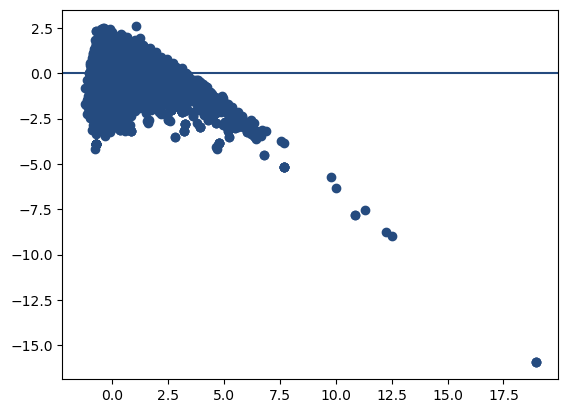

In [219]:
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.show()

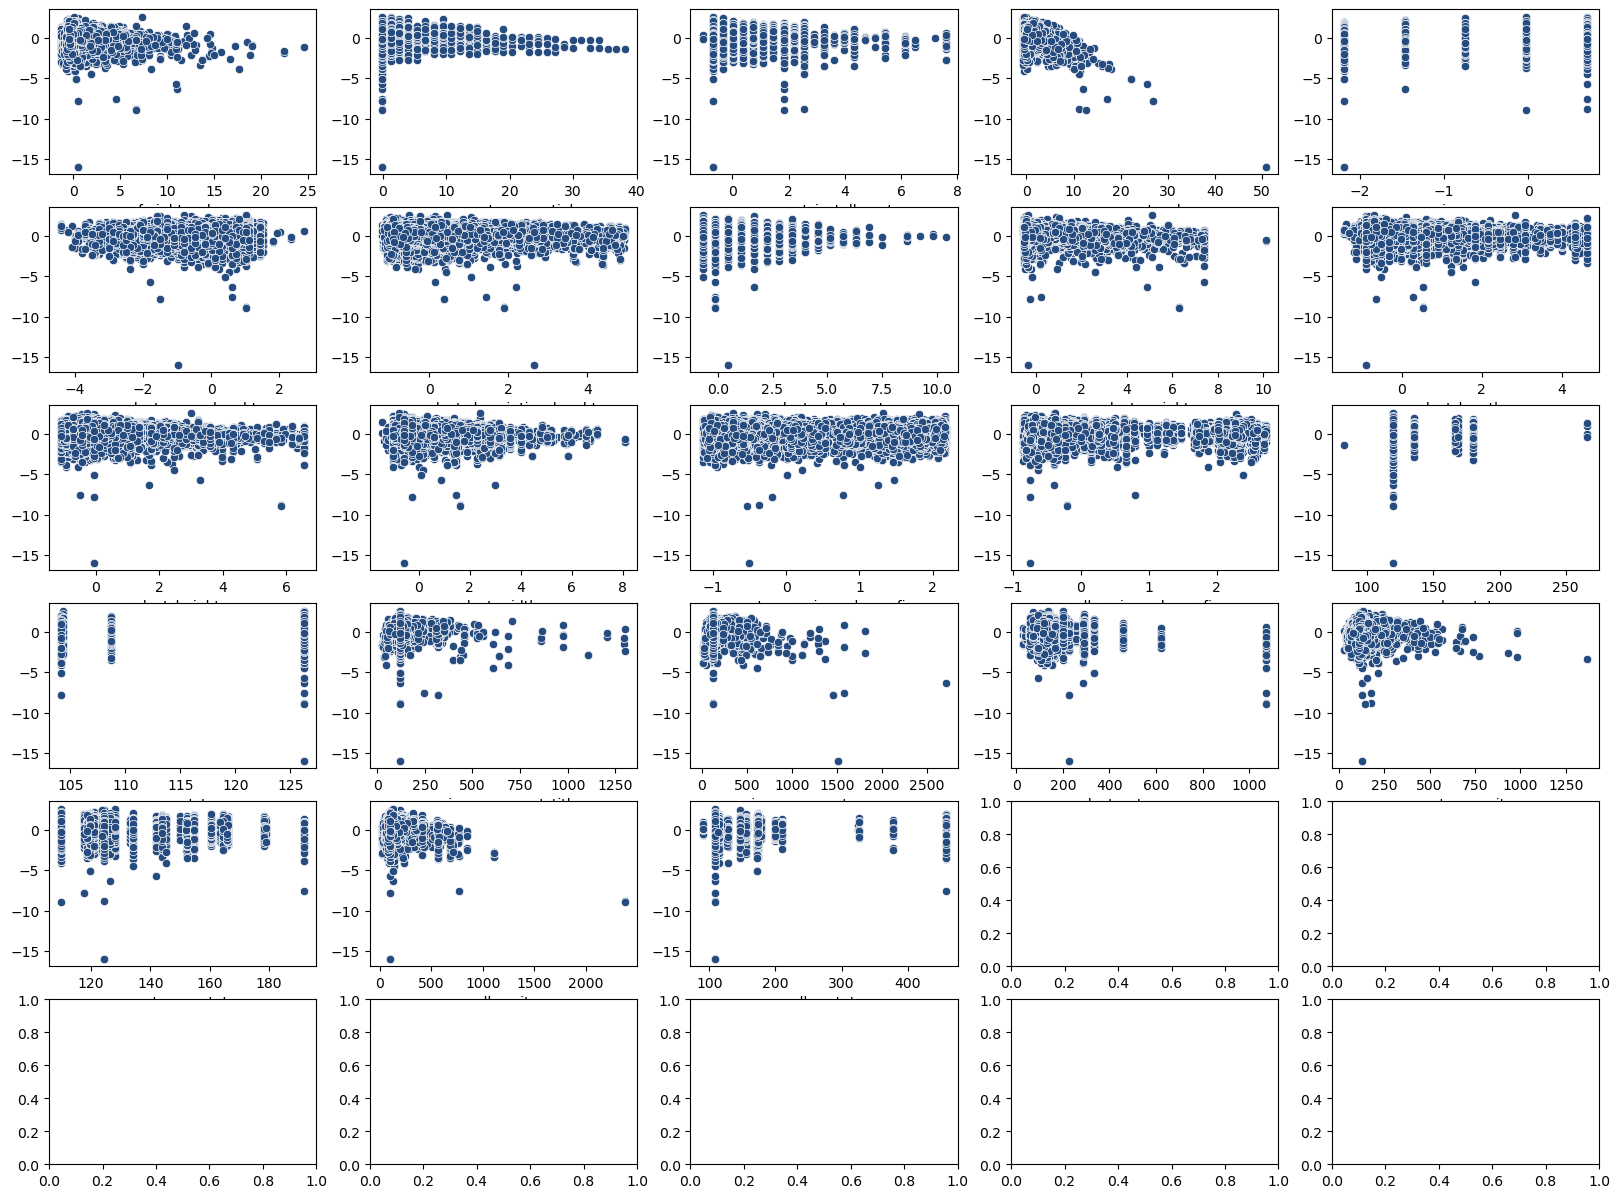

In [220]:
fig, ax = plt.subplots(nrows = 6, ncols = 5, figsize = (20,15))

for variable, subplot in zip(X_c.columns[1:], ax.flatten()):
    sns.scatterplot(x = X_c[variable], y = base_model.resid, ax = subplot)
plt.show()

* H0 : The error terms are not autocorrelated       
* H1 : The error terms are autocorrelated

In [221]:
from statsmodels.stats.api import durbin_watson   
durbin_watson(residuals)

1.9919756300068696

* H0 : The errors terms are homoskedastic
* H1 : The errors terms are heteroskedastic

In [222]:
from statsmodels.stats.api import het_breuschpagan
test_stats, p_value = het_breuschpagan(residuals, X_c)[2:] 
print("p value", p_value)

p value 0.0


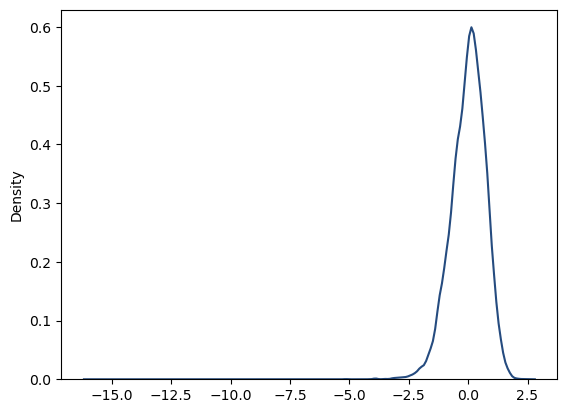

In [223]:
sns.kdeplot(residuals)
plt.show()

In [224]:
stats.shapiro(residuals)  

ShapiroResult(statistic=0.9688560366630554, pvalue=0.0)

In [225]:
from statsmodels.stats.api import jarque_bera
test_stat, p_value, res_skew, res_kurt = jarque_bera(residuals)
p_value

0.0

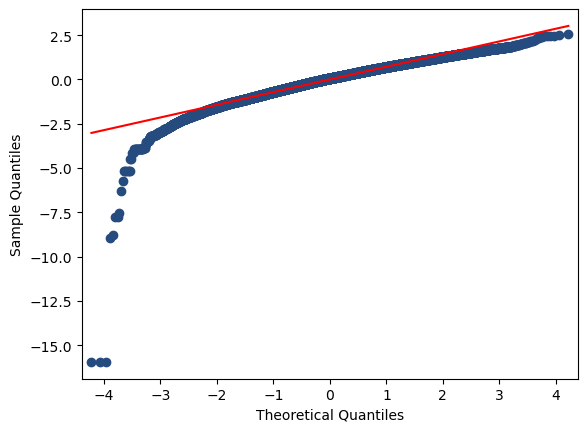

In [226]:
# QQPLOT -- QUANTILE PLOT -- Data is not normal because it is not along the line -- positive and negative data
sm.qqplot(residuals, line = 'r');

In [227]:
lr=LinearRegression()
model_lr = lr.fit(X_train,y_train)   # Linear regression model using sklearn method
model_lr

LinearRegression()

In [228]:
performance(X_train,y_train,model_lr)  # Training R2 and MAE score

R2 score is :  0.4719032002261129
MAE score is :  0.5658358101353103


In [229]:
performance(X_test,y_test,model_lr)  # Testing R2 and MAE score

R2 score is :  0.4394121981755591
MAE score is :  0.5689565480802902


In [230]:
score_table(X_train,X_test, y_train, y_test, model_lr, "Linear Regression")

In [231]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [232]:
# FORWARD

lr = LinearRegression()
lr_sfs = sfs(estimator = lr, k_features = 'best', forward = True)

sfs_forward = lr_sfs.fit(X_train,y_train)
forward_feature = list(sfs_forward.k_feature_names_)
forward_feature

['freight_value',
 'payment_sequential',
 'payment_installments',
 'payment_value',
 'review_score',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'seller_zip_code_prefix',
 'order_status',
 'payment_type',
 'review_comment_title',
 'review_comment_message',
 'product_category_name',
 'customer_city',
 'customer_state',
 'seller_city',
 'seller_state']

In [233]:
len(forward_feature)

22

In [234]:
# BACKWARD

lr = LinearRegression()
lr_sfs = sfs(estimator = lr, k_features = 'best', forward = False)

sfs_back = lr_sfs.fit(X_train,y_train)
backward_feature = list(sfs_back.k_feature_names_)
backward_feature

['freight_value',
 'payment_sequential',
 'payment_installments',
 'payment_value',
 'review_score',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'seller_zip_code_prefix',
 'order_status',
 'payment_type',
 'review_comment_title',
 'review_comment_message',
 'product_category_name',
 'customer_city',
 'customer_state',
 'seller_city',
 'seller_state']

In [235]:
len(backward_feature)

22

In [236]:
# RFE

from sklearn.feature_selection import RFE

lr = LinearRegression()
lr_rfe = RFE(estimator = lr, n_features_to_select = 22)  
rfe_model = lr_rfe.fit(X_train,y_train)
rfe_model.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1])

In [237]:
# EXTRACT RANK - 1 FEATURE NAMES  
rfe_rank = pd.DataFrame()
rfe_rank['Rank'] = rfe_model.ranking_
rfe_rank['Features'] = X_train.columns
rfe_list = list(rfe_rank[rfe_rank['Rank'] == 1]['Features'])
rfe_list

['freight_value',
 'payment_sequential',
 'payment_installments',
 'payment_value',
 'review_score',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'customer_zip_code_prefix',
 'seller_zip_code_prefix',
 'order_status',
 'payment_type',
 'review_comment_message',
 'product_category_name',
 'customer_city',
 'customer_state',
 'seller_city',
 'seller_state']

# Decision Tree

In [238]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [239]:
performance(X_train,y_train,dt)  # Training R2 and MAE score

R2 score is :  0.9999998212967505
MAE score is :  2.4154145482084006e-06


In [240]:
performance(X_test,y_test,dt)  # Testing R2 and MAE score

R2 score is :  0.8685793232680978
MAE score is :  0.1228226722357362


In [241]:
%%time
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [2,3,4,5,6], 
    'min_samples_split': [2,3,4,5,6],
    "max_features"  : [20,24,28,33],
    "max_leaf_nodes" : [2,4,6,8,10]
}

dtr = DecisionTreeRegressor(random_state = 10)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 24, 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
CPU times: total: 41min 46s
Wall time: 47min 9s


In [242]:
dtr = DecisionTreeRegressor(**grid_search.best_params_, random_state=123)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, max_features=24, max_leaf_nodes=10,
                      min_samples_leaf=2, random_state=123)

In [243]:
performance(X_train,y_train,dtr)  # Training R2 and MAE score

R2 score is :  0.6897344658043558
MAE score is :  0.39483753549195594


In [244]:
performance(X_test,y_test,dtr)  # Testing R2 and MAE score

R2 score is :  0.6927892843288358
MAE score is :  0.3934903290564659


In [245]:
score_table(X_train,X_test, y_train, y_test, dtr, "Decision Tree")

In [246]:
# BACKWARD

dtr = DecisionTreeRegressor()
dtr_sfs = sfs(estimator = dtr, k_features = 'best', forward = False)

dtr_back = dtr_sfs.fit(X_train,y_train)
backward_feature = list(dtr_back.k_feature_names_)
backward_feature

['freight_value',
 'payment_sequential',
 'payment_value',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_height_cm',
 'seller_zip_code_prefix',
 'order_status',
 'review_comment_message',
 'product_category_name',
 'seller_city']

# KNN

In [247]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [248]:
performance(X_train,y_train,knn)  # Training R2 and MAE score

R2 score is :  0.6448676091869565
MAE score is :  0.423559168556426


In [249]:
performance(X_test,y_test,knn)   # Testing R2 and MAE score

R2 score is :  0.4519204218071049
MAE score is :  0.5317184988836363


In [250]:
score_table(X_train,X_test, y_train, y_test, knn, "KNN")

# Random Forest

In [251]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [252]:
performance(X_train,y_train,rf)  # Training R2 and MAE score

R2 score is :  0.990477640491645
MAE score is :  0.04354503706359402


In [253]:
performance(X_test,y_test,rf)  # Testing R2 and MAE score

R2 score is :  0.933270726036771
MAE score is :  0.11684593385859494


In [254]:
score_table(X_train,X_test, y_train, y_test, rf, "Random Forest")

# Adaboost 

In [255]:
adb = AdaBoostRegressor()
adb.fit(X_train,y_train)

AdaBoostRegressor()

In [256]:
performance(X_train,y_train,adb)  # Training R2 and MAE score

R2 score is :  0.5595001245464929
MAE score is :  0.5418649358727877


In [257]:
performance(X_test,y_test,adb)   # Testing R2 and MAE score

R2 score is :  0.5552514802036081
MAE score is :  0.5433556819694303


In [258]:
score_table(X_train,X_test, y_train, y_test, adb, "Adaboost")

# GradientBoosting

In [259]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [260]:
performance(X_train,y_train,gb)   # Training R2 and MAE score

R2 score is :  0.8321552931222456
MAE score is :  0.2738398848355144


In [261]:
performance(X_test,y_test,gb)   # Testing R2 and MAE score

R2 score is :  0.8284200609424842
MAE score is :  0.2757084808727222


In [262]:
score_table(X_train,X_test, y_train, y_test, gb, "Gradient Boosting")

# Ridge

In [263]:
rg = Ridge()
rg.fit(X_train,y_train)

Ridge()

In [264]:
performance(X_train,y_train,rg)  # Training R2 and MAE score

R2 score is :  0.4719032001965613
MAE score is :  0.5658360887755367


In [265]:
performance(X_test,y_test,rg)   # Testing R2 and MAE score

R2 score is :  0.4394130264342683
MAE score is :  0.5689568195536916


In [266]:
%%time

param = {'alpha':[0.01, 0.1, 0.5, 1, 2,3,4]}

rg = Ridge()

rg_cv = GridSearchCV(estimator = rg, param_grid=param, cv = 5, scoring='r2')

rg_cv.fit(X_train,y_train)

rg_cv.best_params_

CPU times: total: 7.39 s
Wall time: 2.46 s


{'alpha': 4}

In [267]:
rg = Ridge(**rg_cv.best_params_)
rg.fit(X_train,y_train)

Ridge(alpha=4)

In [268]:
performance(X_train,y_train,rg)  # Training R2 and MAE score

R2 score is :  0.4719031997533423
MAE score is :  0.5658369246318171


In [269]:
performance(X_test,y_test,rg)  # Testing R2 and MAE score

R2 score is :  0.43941551056320893
MAE score is :  0.5689576339025795


In [270]:
score_table(X_train,X_test, y_train, y_test, rg, "Ridge")

# Lasso

In [271]:
ls = Lasso()
ls.fit(X_train,y_train)

Lasso()

In [272]:
performance(X_train,y_train,ls)  # Training R2 and MAE score

R2 score is :  0.2069429494611159
MAE score is :  0.7016738510076335


In [273]:
performance(X_test,y_test,ls)  # Testing R2 and MAE score

R2 score is :  0.20502929603409603
MAE score is :  0.7018316582826365


In [274]:
%%time

param = {'alpha':[0.001, 0.01, 0.1, 0.5, 1]}

ls = Lasso()

ls_cv = GridSearchCV(estimator=ls, param_grid= param, cv=5, scoring='r2' )

ls_cv.fit(X_train, y_train)

ls_cv.best_params_

CPU times: total: 7.02 s
Wall time: 2.59 s


{'alpha': 0.001}

In [275]:
ls = Lasso(**ls_cv.best_params_)
ls.fit(X_train,y_train)

Lasso(alpha=0.001)

In [276]:
performance(X_train,y_train,ls)  # Training R2 and MAE score

R2 score is :  0.4718920358181825
MAE score is :  0.5658951181727577


In [277]:
performance(X_test,y_test,ls)  # Testing R2 and MAE score

R2 score is :  0.4394705284247735
MAE score is :  0.5690367401461727


In [278]:
score_table(X_train,X_test, y_train, y_test, ls, "Lasso")

# ElasticNet

In [279]:
en = ElasticNet()
en.fit(X_train,y_train)

ElasticNet()

In [280]:
performance(X_train,y_train,en)  # Training R2 and MAE score

R2 score is :  0.20992424632204365
MAE score is :  0.6996958785506573


In [281]:
performance(X_test,y_test,en)   # Testing R2 and MAE score

R2 score is :  0.20748534539591534
MAE score is :  0.699881819895755


In [282]:
%%time

param = {'alpha':[0.0001, 0.001, 0.01, 0.1, 0.5, 1],
         'l1_ratio':[0.01,0.1,0.3,0.5,0.7, 0.9, 1]}

eln = ElasticNet()

eln_cv = GridSearchCV(estimator=eln, param_grid= param, cv=5, scoring='r2')

eln_cv.fit(X_train, y_train)

eln_cv.best_params_

CPU times: total: 1min 10s
Wall time: 22.6 s


{'alpha': 0.01, 'l1_ratio': 0.01}

In [283]:
eln = ElasticNet(**eln_cv.best_params_)
eln.fit(X_train, y_train)

ElasticNet(alpha=0.01, l1_ratio=0.01)

In [284]:
performance(X_train,y_train,eln)  # Training R2 and MAE score

R2 score is :  0.47188248172446445
MAE score is :  0.5660725245731264


In [285]:
performance(X_test,y_test,eln)   # Testing R2 and MAE score

R2 score is :  0.4400559492700332
MAE score is :  0.5691857370427704


In [286]:
score_table(X_train,X_test, y_train, y_test, eln, "Elastic Net")

# XGBRegressor

In [287]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [288]:
performance(X_train,y_train,xgb)  # Training R2 and MAE score

R2 score is :  0.9281324653711821
MAE score is :  0.1681816011164085


In [289]:
performance(X_test,y_test,xgb)   # Testing R2 and MAE score

R2 score is :  0.9039083598018871
MAE score is :  0.19075903643342831


In [290]:
score_table(X_train,X_test, y_train, y_test,xgb , "XGBoost")

In [291]:
# BACKWARD

xgb = XGBRegressor()
lr_sfs = sfs(estimator = xgb, k_features = 'best', forward = False)

sfs_back = lr_sfs.fit(X_train,y_train)
backward_feature = list(sfs_back.k_feature_names_)
backward_feature

['freight_value',
 'payment_sequential',
 'payment_value',
 'review_score',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'seller_zip_code_prefix',
 'payment_type',
 'review_comment_message',
 'product_category_name',
 'seller_city']

In [292]:
results_df = pd.DataFrame({'Model': Model_name, 'R2 Train Score': R2_train_score ,'R2 Test Score': R2_test_score , 'MAE Train Score': MAE_train_score, 'MAE Test Score': MAE_test_score})

In [293]:
results_df

,Model,R2 Train Score,R2 Test Score,MAE Train Score,MAE Test Score
0,Linear Regression,0.471903,0.439412,0.565836,0.568957
1,Decision Tree,0.689734,0.692789,0.394838,0.393490
2,KNN,0.644868,0.451920,0.423559,0.531718
3,Random Forest,0.990478,0.933271,0.043545,0.116846
4,Adaboost,0.559500,0.555251,0.541865,0.543356
5,Gradient Boosting,0.832155,0.828420,0.273840,0.275708
6,Ridge,0.471903,0.439416,0.565837,0.568958
7,Lasso,0.471892,0.439471,0.565895,0.569037
8,Elastic Net,0.471882,0.440056,0.566073,0.569186
9,XGBoost,0.928132,0.903908,0.168182,0.190759


In [294]:
feature_importants = rf.feature_importances_
feature_importants

array([3.40257779e-02, 1.68269997e-02, 2.49702181e-03, 6.46829601e-01,
       2.10622394e-03, 8.39858582e-03, 1.25607305e-02, 4.23256409e-03,
       4.27267293e-02, 8.82956388e-03, 9.21604009e-03, 6.36355210e-03,
       7.26803526e-03, 1.27059949e-02, 3.01956049e-04, 1.14485109e-03,
       1.51768115e-03, 1.26398548e-01, 1.91718104e-02, 8.75504462e-03,
       2.54609017e-03, 2.39025873e-02, 1.67401098e-03])

In [295]:
imp_fea = pd.DataFrame(zip(X_train.columns, feature_importants),columns = ['Columns','Importants'])
imp_fea = imp_fea.sort_values('Importants', ascending = False)
imp_fea

,Columns,Importants
3,payment_value,0.646830
17,review_comment_message,0.126399
8,product_weight_g,0.042727
0,freight_value,0.034026
21,seller_city,0.023903
18,product_category_name,0.019172
1,payment_sequential,0.016827
13,seller_zip_code_prefix,0.012706
6,product_description_lenght,0.012561
10,product_height_cm,0.009216


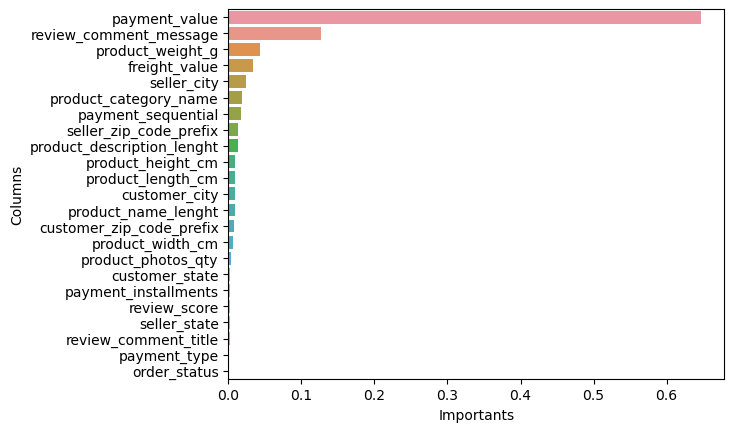

In [296]:
sns.barplot(y = 'Columns', x = 'Importants', data = imp_fea)
plt.show()

In [297]:
X = final_df[['payment_value', 'review_comment_message', 'product_weight_g', 'freight_value', 
          'seller_city', 'product_category_name', 'payment_sequential', 
          'product_description_lenght', 'seller_zip_code_prefix', 'product_height_cm', 
          'customer_city', 'product_length_cm', 'product_name_lenght', 
          'customer_zip_code_prefix', 'product_width_cm', 'product_photos_qty', 
          'customer_state', 'payment_installments', 'review_score', 
          'seller_state', 'review_comment_title', 'payment_type', 'order_status']]
y = transformed_data_yeo

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state = 10)
print("X Train shape is ",X_train.shape)
print("X Test shape is ",X_test.shape)
print("y Train shape is ",y_train.shape)
print("y Test shape is ",y_test.shape)

X Train shape is  (82130, 23)
X Test shape is  (35199, 23)
y Train shape is  (82130, 1)
y Test shape is  (35199, 1)


In [299]:
Model_name = []
R2_train_score = []
R2_test_score = []
MAE_train_score = []
MAE_test_score = []

In [300]:
def score_table_2(x_train, x_test, y_train, y_test, model, model_name):
        
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)


    r2_train_score = r2_score(y_train,y_train_pred)
    r2_test_score = r2_score(y_test,y_test_pred)

    mae_train_Score = mean_absolute_error(y_train,y_train_pred)
    mae_test_Score = mean_absolute_error(y_test,y_test_pred)

    
    Model_name.append(model_name)
    R2_train_score.append(r2_train_score)
    R2_test_score.append(r2_test_score)
    MAE_train_score.append(mae_train_Score)
    MAE_test_score.append(mae_test_Score)

# AdaBoostRegressor

In [301]:
adb = AdaBoostRegressor()
adb.fit(X_train,y_train)

AdaBoostRegressor()

In [302]:
performance(X_train,y_train,adb)  # Training R2 and MAE score

R2 score is :  0.5544161825795786
MAE score is :  0.5490823588154431


In [303]:
performance(X_test,y_test,adb)   # Testing R2 and MAE score

R2 score is :  0.5461738751277718
MAE score is :  0.5530017909030912


In [304]:
score_table_2(X_train,X_test, y_train, y_test, adb, "Adaboost")

# RandomForestRegressor

In [305]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [306]:
performance(X_train,y_train,rf)  # Training R2 and MAE score

R2 score is :  0.9904463296507854
MAE score is :  0.04346155848990974


In [307]:
performance(X_test,y_test,rf)   # Testing R2 and MAE score

R2 score is :  0.9333787540230178
MAE score is :  0.11650576096341436


In [308]:
score_table_2(X_train,X_test, y_train, y_test, rf, "Random Forest")

# XGBRegressor

In [309]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [310]:
performance(X_train,y_train,xgb)  # Training R2 and MAE score

R2 score is :  0.9281324653711821
MAE score is :  0.1681816011164085


In [311]:
performance(X_test,y_test,xgb)   # Testing R2 and MAE score

R2 score is :  0.9038877281639792
MAE score is :  0.1907834265655079


In [312]:
score_table_2(X_train,X_test, y_train, y_test, xgb, "XGBoost")

# GradientBoostingRegressor

In [313]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [314]:
performance(X_train,y_train,gb)   # Training R2 and MAE score

R2 score is :  0.8321552931222456
MAE score is :  0.27383988483551436


In [315]:
performance(X_test,y_test,gb)   # Testing R2 and MAE score

R2 score is :  0.8284240442913263
MAE score is :  0.275704606790005


In [316]:
score_table_2(X_train,X_test, y_train, y_test, gb, "GradientBoost")

In [317]:
results_df = pd.DataFrame({'Model': Model_name, 'R2 Train Score': R2_train_score ,'R2 Test Score': R2_test_score , 'MAE Train Score': MAE_train_score, 'MAE Test Score': MAE_test_score})

In [318]:
results_df

,Model,R2 Train Score,R2 Test Score,MAE Train Score,MAE Test Score
0,Adaboost,0.554416,0.546174,0.549082,0.553002
1,Random Forest,0.990446,0.933379,0.043462,0.116506
2,XGBoost,0.928132,0.903888,0.168182,0.190783
3,GradientBoost,0.832155,0.828424,0.273840,0.275705
